# Government Interoperability Zone Alignment

In [22]:
install.packages('seqinr', repos='http://cran.us.r-project.org')

also installing the dependencies 'ade4', 'segmented'



package 'ade4' successfully unpacked and MD5 sums checked
package 'segmented' successfully unpacked and MD5 sums checked
package 'seqinr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\mans\AppData\Local\Temp\RtmpGgYT2w\downloaded_packages


In [1]:
generateRandomZoneSeqsWithMultinomialModel <- function(initialCase, N)
{
    require("seqinr") 
    
    inputChars <- s2c(initialCase)
    
    the.length <- length(inputChars)
    the.table <- table(inputChars)
    
    letters <- rownames(the.table)
    numletters <- length(letters)
    probabilities <- numeric() 
    
    for (i in 1:numletters) probabilities[i] <- the.table[[i]] / the.length
    
    zone.seqs <- numeric(N)
    
    for (j in 1:N)
        zone.seqs[j] <- c2s(sample(letters, the.length, rep=TRUE, prob=probabilities))
    
    return(zone.seqs)
}


total.cases<-1000

conceptual.cases <- generateRandomZoneSeqsWithMultinomialModel('0233',total.cases)
conceptual.cases[1:10]


Loading required package: seqinr
Warning message:
"package 'seqinr' was built under R version 3.4.4"

[1] "0203" "2330" "0333" "0030" "0333" "3322" "3222" "2330" "2300" "2003"

In [2]:
standard_str <- "3333"
standard <- as.numeric(s2c(standard_str))
standard

[1] 3 3 3 3

In [5]:
align<- function(standard, case.str, summing=FALSE){
    cas<-as.numeric(s2c(case.str))
    numletters <- length(cas)
    diffs <- numeric()
    
    for (i in 1:numletters)
    {
        letter <- cas[i]
        count <- standard[i]

        diffs[i] <- abs(count-letter)
    }
    
    if(summing)
        res<- sum(diffs)
    else 
        res<- sum(diffs !=0)
    return (res)
}



In [7]:
align(standard, '0233', TRUE)

[1] 4

In [8]:
align(standard, '0233')

[1] 2

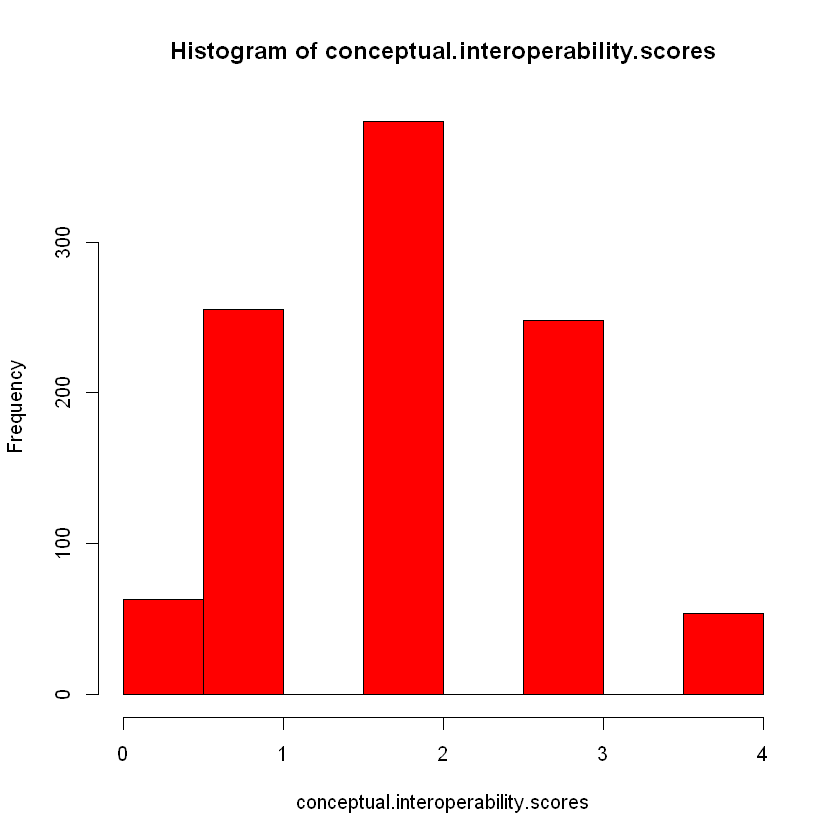

In [6]:
conceptual.interoperability.scores <- double(total.cases) 

for (i in 1:total.cases)
    conceptual.interoperability.scores[i] <- align(standard, conceptual.cases[i])

hist(conceptual.interoperability.scores, col="red")

In [10]:
sum(conceptual.interoperability.scores <= 2)

[1] 698

In [16]:
sum(conceptual.interoperability.scores > 2)

[1] 302

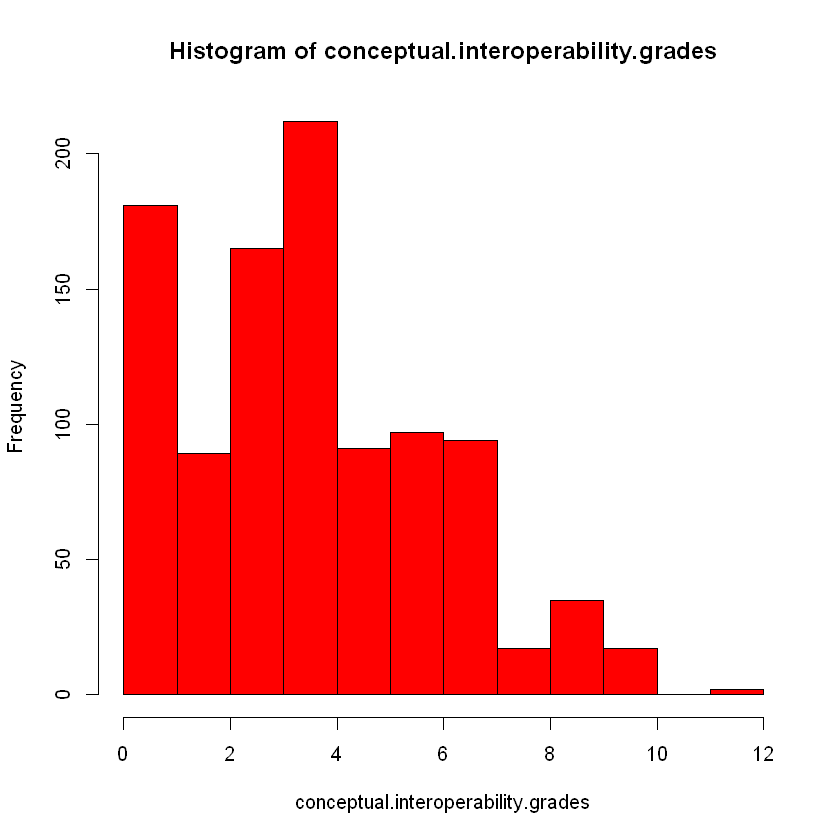

In [12]:
conceptual.interoperability.grades <- double(total.cases) 

for (i in 1:total.cases)
    conceptual.interoperability.grades[i] <- align(standard, conceptual.cases[i], TRUE)

hist(conceptual.interoperability.grades, col="red")

In [14]:
sum(conceptual.interoperability.grades > 4)

[1] 353

In [15]:
sum(conceptual.interoperability.grades <= 4)

[1] 647

# organizational

In [17]:
organizational.cases <- generateRandomZoneSeqsWithMultinomialModel('0113',total.cases)
organizational.cases[1:10]

[1] "0301" "3311" "1111" "3001" "3000" "3131" "1311" "1010" "1103" "1131"

In [18]:
align(standard, '0113', TRUE)

[1] 7

In [19]:
align(standard, '0113')

[1] 3

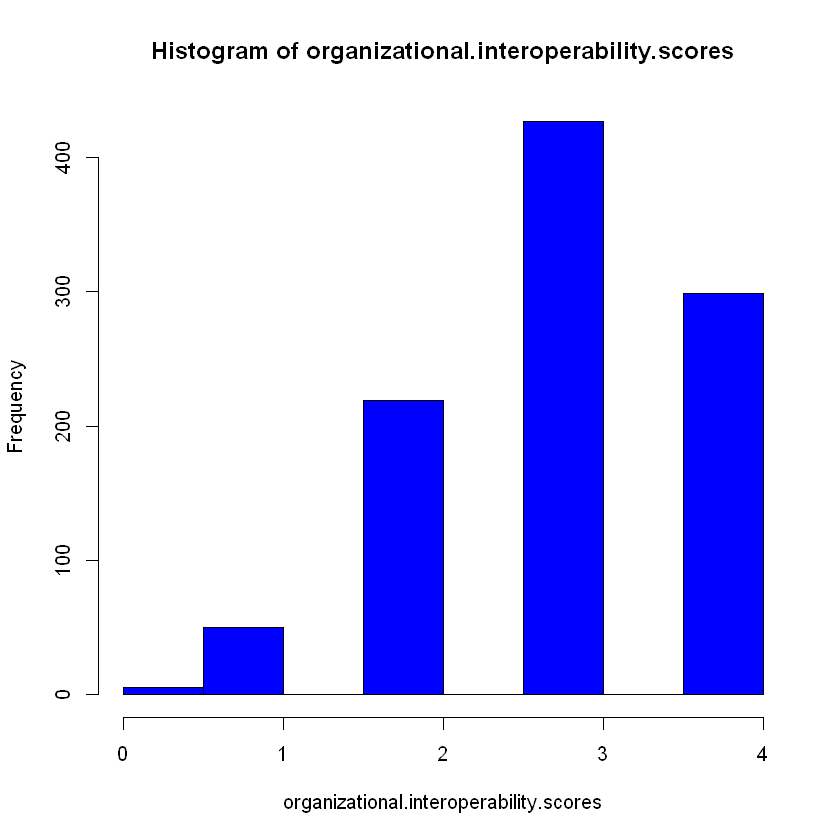

In [20]:
organizational.interoperability.scores <- double(total.cases) 

for (i in 1:total.cases)
    organizational.interoperability.scores[i] <- align(standard, organizational.cases[i])

hist(organizational.interoperability.scores, col="blue")

In [22]:
sum(organizational.interoperability.scores > 3)

[1] 299

In [21]:
sum(organizational.interoperability.scores <= 3)

[1] 701

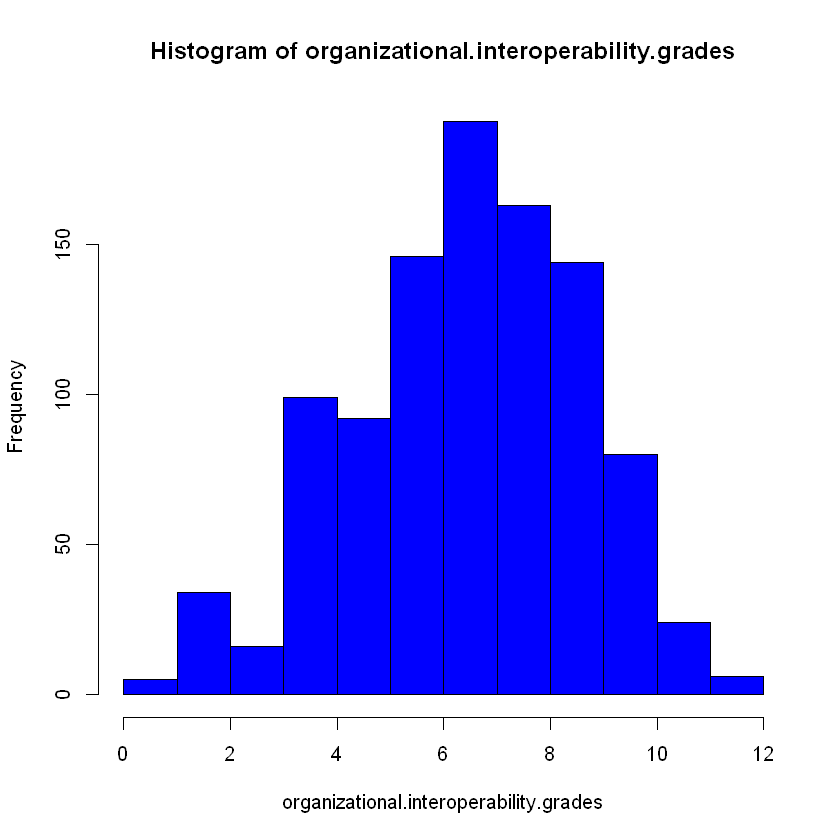

In [23]:
organizational.interoperability.grades <- double(total.cases) 

for (i in 1:total.cases)
    organizational.interoperability.grades[i] <- align(standard, organizational.cases[i], TRUE)

hist(organizational.interoperability.grades, col="blue")

In [25]:
sum(organizational.interoperability.grades > 7)

[1] 417

In [26]:
sum(organizational.interoperability.grades <= 7)

[1] 583

# using R to generate case-train using a particular multinomial model

In [27]:
operatioal.scenarios <- s2c("0123") 

conceptual.multinomial.sample<- as.numeric(sample(operatioal.scenarios, total.cases, rep=TRUE, prob=c(1/4, 0/4, 1/4, 2/4) ))
conceptual.multinomial.sample

[1] 3 2 3 3 3 3 2 3 3 3 3 3 0 3 3 3 3 3 3 3 0 2 0 3 2 2 3 3 3 2 3 3 2 0 0 2 2
  [38] 2 3 0 3 3 2 0 2 0 3 0 3 0 3 3 0 3 0 2 2 3 3 2 3 3 2 0 2 3 0 0 3 2 3 3 2 0
  [75] 2 0 0 0 0 3 3 3 2 2 2 3 3 3 3 2 3 2 0 3 0 0 0 0 2 3 3 3 3 2 2 3 0 0 2 0 0
 [112] 3 0 2 0 2 3 0 2 0 0 3 2 2 3 0 0 3 3 2 0 3 3 3 0 2 3 2 0 3 3 2 3 0 2 3 0 0
 [149] 2 3 2 3 3 0 0 3 3 3 2 2 2 0 2 0 3 3 0 3 2 2 3 3 3 3 3 0 3 2 2 2 0 0 3 2 0
 [186] 3 3 2 2 3 3 2 3 2 0 0 3 2 0 3 3 0 0 3 2 3 3 0 2 2 2 2 3 3 0 2 3 3 2 3 2 0
 [223] 0 3 3 3 2 3 0 3 0 3 2 3 3 2 3 3 0 0 0 3 2 3 3 2 3 3 3 3 3 3 2 0 0 0 0 2 3
 [260] 2 0 2 2 3 3 3 0 3 0 3 0 0 3 3 0 3 2 3 2 3 0 3 3 3 2 0 3 3 0 3 2 2 2 0 3 3
 [297] 3 3 3 2 2 3 2 3 0 3 2 3 3 0 3 0 3 3 2 3 3 2 2 3 3 3 3 0 3 3 3 3 3 3 3 0 3
 [334] 0 3 3 3 0 3 3 0 3 0 0 3 2 3 0 3 2 0 0 3 0 0 2 2 0 0 2 3 3 2 2 3 2 0 2 3 0
 [371] 3 0 3 2 3 3 3 3 0 3 3 3 3 2 2 3 0 3 3 3 3 2 2 3 3 2 3 3 3 0 2 3 2 3 2 0 3
 [408] 2 2 2 2 2 3 0 3 3 3 0 0 3 0 0 0 0 3 0 0 2 2 3 2 0 3 3 3 3 0 3 0 3 2 0 3 0
 [445] 0 2 2 3 2 3 3 0 0 3 0 3 0 3 3 3 3 3 2 3 2 2 0 2 3 3 0 3 3 2 2 3 3 2 3 0 2
 [482] 0 3 3 2 3 3 3 2 3 0 3 0 0 0 3 3 3 0 0 0 2 2 2 0 3 0 0 2 3 0 3 3 0 0 3 2 0
 [519] 0 3 0 3 2 2 0 2 3 3 3 2 2 2 0 3 3 2 3 3 3 3 0 3 2 3 0 0 0 3 3 0 3 2 3 2 2
 [556] 0 3 3 0 0 0 2 2 2 3 3 2 2 3 3 2 2 3 2 0 0 3 2 3 2 2 2 2 0 2 2 3 3 2 2 0 0
 [593] 3 2 0 3 2 3 3 3 3 3 3 3 3 0 3 3 3 2 3 0 0 2 3 2 3 0 3 2 0 0 3 3 3 3 3 3 3
 [630] 0 3 2 2 3 3 3 3 3 3 3 3 2 0 0 0 0 3 0 3 0 0 2 2 0 3 3 3 0 3 3 0 0 2 3 3 2
 [667] 2 3 3 0 3 3 0 2 2 2 3 3 3 3 2 3 0 3 0 2 3 0 0 0 2 3 3 0 3 0 3 2 3 2 3 3 3
 [704] 3 2 3 3 2 2 3 2 3 2 3 2 0 0 3 2 3 3 3 3 2 3 2 3 2 0 2 0 3 2 2 3 0 2 3 3 3
 [741] 3 3 3 0 0 0 3 0 0 2 3 0 2 3 3 0 0 0 0 3 3 2 3 0 3 2 3 3 3 3 3 2 2 3 2 3 3
 [778] 3 0 2 3 0 3 3 0 0 3 0 3 0 3 2 2 0 3 3 3 2 3 0 0 3 2 3 3 2 0 3 0 3 3 3 0 0
 [815] 3 3 3 3 0 3 3 3 3 2 2 3 3 3 3 0 3 3 3 3 3 3 3 0 0 0 0 3 0 0 3 0 3 3 0 3 3
 [852] 2 2 3 3 3 0 3 3 3 3 2 3 3 3 3 3 2 3 2 3 0 3 3 0 3 2 0 3 3 3 0 0 3 3 0 3 3
 [889] 3 3 2 2 0 3 2 2 3 3 2 3 3 2 2 3 3 2 3 2 3 3 3 0 3 3 0 2 2 3 2 0 2 3 3 3 2
 [926] 3 2 2 2 3 3 3 3 2 2 0 3 3 3 0 0 3 3 3 2 2 2 0 2 0 3 3 2 2 0 0 0 2 3 0 3 2
 [963] 3 0 2 3 0 2 2 3 3 0 3 2 3 0 0 2 3 3 3 3 0 3 0 2 3 2 0 3 0 0 2 3 3 2 2 2 0
[1000] 2

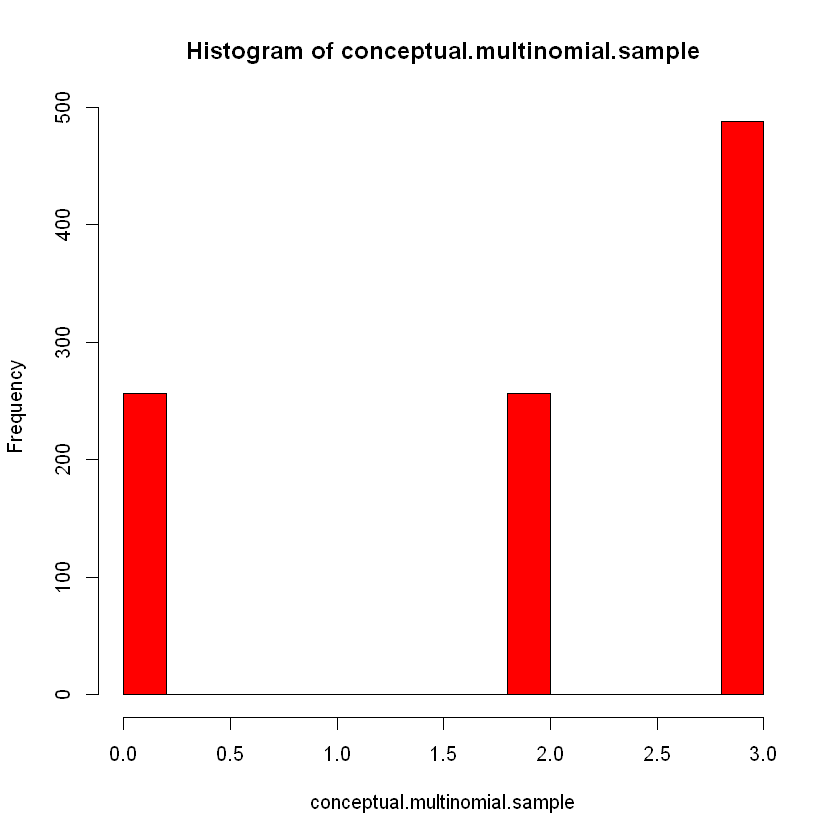

In [28]:
hist(conceptual.multinomial.sample, col="red")

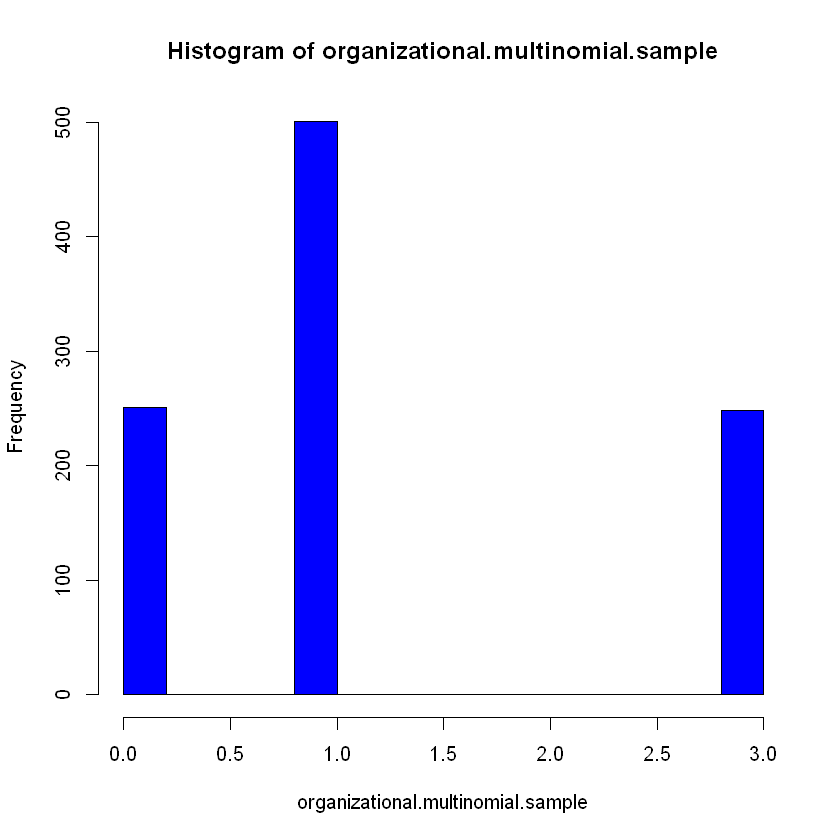

In [29]:
operatioal.scenarios <- s2c("0123") 

organizational.multinomial.sample<- as.numeric(sample(operatioal.scenarios, total.cases, rep=TRUE, prob=c(1/4, 2/4, 0/4, 1/4) ))
hist(organizational.multinomial.sample, col="blue")


# The transition matrix for a Markov model

In [30]:
post.0.probs <- c(1/4, 0/4, 1/4, 2/4)
post.1.probs <- c(1/4, 2/4, 0/4, 1/4)
post.2.probs <- c(1/4, 0/4, 1/4, 2/4) 
post.3.probs <- c(1/4, 1/4, 1/4, 1/4) 
transition.matrix <- matrix(c(post.0.probs, post.1.probs, post.2.probs, post.3.probs), 4, 4, byrow = TRUE) 

rownames(transition.matrix) <- operatioal.scenarios
colnames(transition.matrix) <- operatioal.scenarios


transition.matrix

,0,1,2,3
0,0.25,0.00,0.25,0.50
1,0.25,0.50,0.00,0.25
2,0.25,0.00,0.25,0.50
3,0.25,0.25,0.25,0.25


# Generating a case-train using a Markov model

In [31]:
generate.markov.zone.seq <- function(operatioal.scenarios, transition.matrix, initial.probs, N)
{
    zone.sequence <- character() 
    
    zone.sequence[1] <- sample(operatioal.scenarios, 1, rep=TRUE, prob=initial.probs)
    
    for (i in 2:N)
        zone.sequence[i] <-sample(operatioal.scenarios, 1, rep=TRUE, prob=transition.matrix[zone.sequence[i-1],])
    
    return(zone.sequence)
}

In [32]:
markov.sample<- as.numeric(generate.markov.zone.seq(operatioal.scenarios, transition.matrix, c(0.25, 0.25, 0.25, 0.25), total.cases))
markov.sample

[1] 1 1 1 1 3 3 1 1 3 2 2 0 3 3 1 1 3 2 0 0 2 3 2 0 3 1 3 2 0 3 3 2 0 3 0 2 3
  [38] 1 1 0 3 3 1 1 1 0 2 2 0 0 3 3 1 0 3 1 0 3 1 1 0 3 0 2 3 2 3 0 3 2 3 1 3 1
  [75] 1 3 0 3 1 1 1 0 2 2 0 3 0 3 1 1 1 0 3 3 0 0 3 1 3 3 1 3 3 3 0 3 1 0 3 0 2
 [112] 0 2 0 0 3 2 3 2 0 3 2 2 3 1 3 1 0 2 2 2 0 3 3 1 0 3 2 3 2 3 1 0 0 3 1 3 3
 [149] 2 2 3 1 1 3 1 1 1 1 3 0 0 3 1 3 0 3 3 1 3 2 0 3 1 0 2 2 3 2 3 0 2 2 0 3 3
 [186] 0 2 3 0 2 2 3 2 0 3 0 3 0 3 0 0 2 3 3 3 2 3 2 3 1 3 3 3 0 3 2 2 2 0 3 1 3
 [223] 2 0 3 2 3 0 2 0 0 3 1 1 3 0 0 0 2 0 3 3 3 0 3 0 3 1 1 3 3 0 3 1 0 2 3 1 3
 [260] 0 3 2 3 2 3 2 3 2 3 3 0 2 0 3 1 1 1 1 1 3 3 2 3 0 3 0 0 3 2 3 1 3 1 3 0 0
 [297] 3 2 3 3 1 0 2 0 0 3 2 0 3 1 1 1 1 0 3 3 2 2 0 0 0 3 2 2 3 3 0 3 0 0 2 2 3
 [334] 1 1 1 1 1 1 1 1 3 0 0 2 3 0 2 0 3 2 3 3 1 1 0 2 2 3 3 1 3 2 2 3 3 2 3 0 3
 [371] 3 1 1 3 3 2 3 1 1 1 1 1 1 1 3 1 1 1 3 2 2 2 3 2 3 3 0 3 2 3 1 0 3 3 2 3 1
 [408] 0 3 0 2 2 3 0 2 2 2 0 3 3 3 0 3 3 0 0 3 0 3 1 1 0 3 1 0 3 3 1 3 3 3 3 0 3
 [445] 2 3 1 1 1 3 2 3 1 0 3 1 1 3 3 2 2 2 0 3 1 1 3 2 2 3 2 3 1 3 1 1 0 3 1 1 1
 [482] 3 1 1 3 3 2 3 2 2 3 2 3 2 3 0 0 3 3 3 2 3 0 2 3 3 3 2 3 0 2 2 0 3 2 3 0 2
 [519] 0 0 3 0 3 1 1 1 1 1 1 1 3 3 1 1 0 2 3 1 3 3 1 0 0 3 1 0 3 3 0 3 0 3 1 1 1
 [556] 0 2 3 0 0 3 1 3 0 2 3 3 0 3 3 1 1 1 1 1 1 1 0 3 3 2 3 3 3 0 3 0 3 3 0 0 3
 [593] 1 1 0 2 2 3 0 0 0 2 3 0 0 0 3 2 0 3 2 0 3 0 2 3 0 3 1 3 3 1 3 1 1 1 0 0 2
 [630] 2 0 3 3 1 1 1 1 1 1 3 1 0 3 0 3 0 2 2 3 3 0 3 1 1 1 1 0 3 2 3 3 2 2 2 3 3
 [667] 3 1 3 1 1 1 0 3 3 3 1 3 1 3 1 3 3 0 0 3 3 3 0 2 0 3 1 1 3 2 3 0 0 3 0 0 0
 [704] 3 1 0 3 2 3 2 0 3 2 2 0 0 3 3 2 3 3 3 0 3 1 1 3 0 2 3 1 0 2 2 2 3 2 0 3 1
 [741] 1 1 1 0 2 3 3 1 3 3 3 1 3 0 3 2 2 3 2 3 2 0 2 3 3 1 0 2 3 3 1 1 1 3 3 0 3
 [778] 1 3 0 3 0 3 2 0 3 3 0 0 2 2 3 3 0 0 3 2 3 1 1 0 3 1 1 1 3 1 1 3 2 0 0 0 3
 [815] 2 2 3 3 1 3 3 0 3 1 3 0 0 2 3 3 0 3 1 0 3 0 2 0 2 2 0 3 2 2 3 3 2 3 1 3 3
 [852] 0 2 2 0 3 3 1 3 0 2 0 0 0 0 0 2 2 0 3 0 2 3 1 1 1 1 1 1 0 2 3 1 1 1 0 0 2
 [889] 3 3 2 2 2 2 0 0 3 0 3 2 3 0 3 0 3 1 3 2 0 2 0 3 2 2 2 0 3 0 0 2 0 3 2 2 3
 [926] 3 2 2 3 2 3 1 0 3 0 3 1 1 1 1 1 3 2 2 3 2 0 3 0 0 3 1 1 0 3 1 0 3 2 3 0 3
 [963] 0 3 2 3 2 3 2 3 1 1 3 2 3 1 3 1 1 3 3 2 3 2 0 3 0 3 0 2 3 0 0 0 3 2 2 3 2
[1000] 2

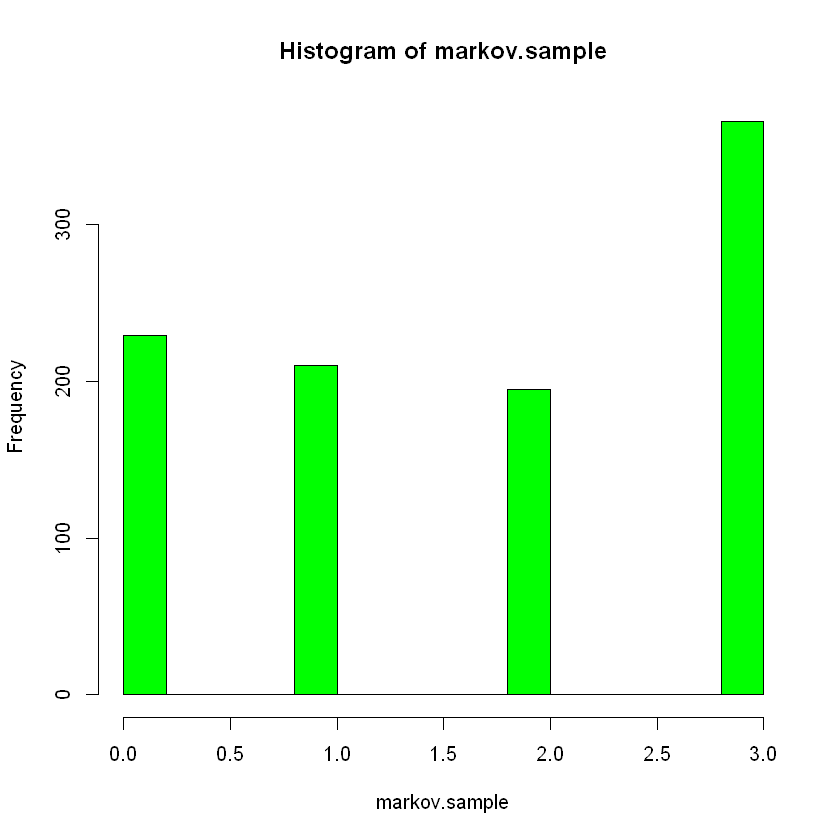

In [33]:
hist(markov.sample, col="green")